In [1]:
import seaborn as sns
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv('../data/data_input_quarterly.csv')
df = df[df["iso2"] == "DE"]

In [3]:
def get_lagged_variables(df, lags, variables):
    lag_array = np.arange(1,lags+1)
    for lag in lag_array:
        for variable in variables:
            df[variable+"_lag"+str(lag)] = df[variable].shift(lag)
    return df

In [4]:
def calculate_growth_rates(df, growth_rate_variables):
    for growth_rate_variable in growth_rate_variables:
        df[growth_rate_variable+"_growthRate"] = df[growth_rate_variable].pct_change(fill_method=None, periods=4)
    return df

In [5]:
GROWTH_VARIABLES = ["cpi_yoy", "bankCreditPnfs", "totalCreditPnfsLCY", "totalCreditPnfs2GDP"]
df = calculate_growth_rates(df, GROWTH_VARIABLES)

In [6]:
df = get_lagged_variables(df, 4, GROWTH_VARIABLES)

c:\Users\Thoma\.conda\envs\eui\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\Thoma\.conda\envs\eui\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='date', ylabel='fx_std'>

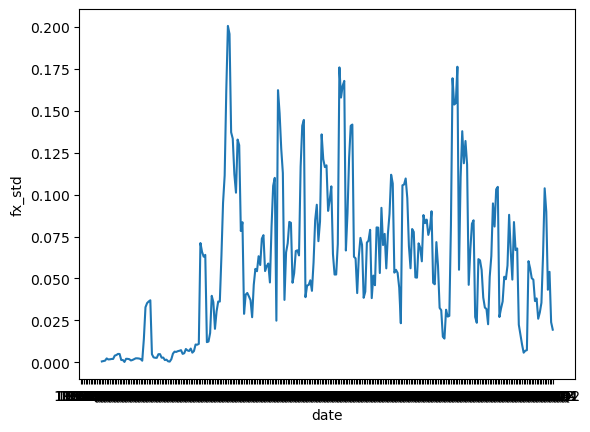

In [16]:
WINDOW = 4
df["fx_std"] =  df["fx"].pct_change(fill_method=None).rolling(WINDOW).std()*(WINDOW**0.5)
sns.lineplot(x=df['date'], y=df["fx_std"] )

c:\Users\Thoma\.conda\envs\eui\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\Thoma\.conda\envs\eui\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='date', ylabel='bankCreditPnfs_growthRate'>

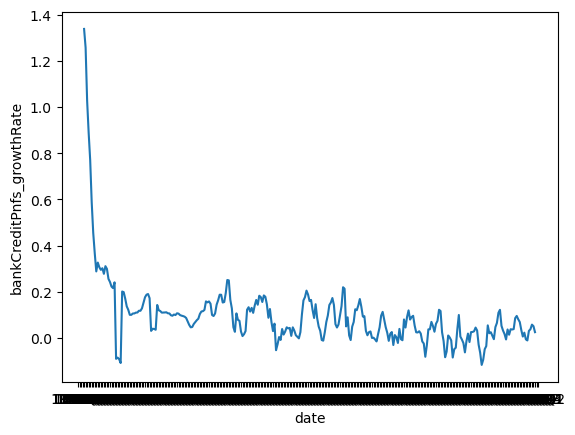

In [7]:
sns.lineplot(data=df,x='date', y="bankCreditPnfs_growthRate")


In [17]:
df.to_csv('data.csv')